### FP growth algo for Market Basket analysis
We need to split each string in itemsets into a list:

data['itemsets'] = data.itemsets.apply(lambda x: x.split(' '))

The Output:

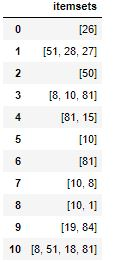

Next, the second argument in "find_frequent_patterns" is the support level. That means the minimum number of times an item (or a group of items) should occur in all transactions combined. You have entered 6. There is no item that occurs 6 times in your dataset. Let us choose 2.

patterns = pyfpgrowth.find_frequent_patterns(data['itemsets'],2)

The Output:

> {('10',): 4, ('10', '8'): 2, ('51',): 2, ('8', '81'): 2, ('81',): 4}

In the above output, ('10','8'):2 means that 10 and 8 together occur two times in the whole dataset.

Moving a step forward, we can use "generate_association_rules" to generate rules based on a cutoff value. For example:

rules = pyfpgrowth.generate_association_rules(patterns, .5)

The Output:

> {('10',): (('8',), 0.5), ('81',): (('8',), 0.5)}

It means that 10 and 8 occur together in 50% of all transactions of 10 in the whole dataset (which is 4)

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data.head()

,BID ID,User ID,Seller ID,Order ID,FlagSuccessfulBidder
0,65051,222457,745,345949,0
1,65051,222457,25471,345949,0
2,65051,222457,39522,345949,0
3,65051,222457,48186,345949,1
4,65051,222457,51117,345949,0


In [5]:
#masking col names
data.columns = ['B','UID','SID','OID','W']

In [7]:
# convert the data SID coumn into collection of SIDs with respect to column B
df = data[['B','SID']].drop_duplicates().groupby('B')['SID'].apply(list)

In [9]:
# Basically the list has numbers which were related to value in B. Same numbers in list can be in different B. We try to find
# out which SIDs occur together most often

df.head()

B
143    [52, 64, 70, 415, 433, 2617]
145            [746, 750, 776, 843]
154                 [64, 547, 1040]
155                       [64, 547]
162                       [52, 821]
Name: SID, dtype: object

In [12]:
# List of Lists. We will use this in fpgrowth
transactions = list(df.values)

In [13]:
import pyfpgrowth
import sys
sys.setrecursionlimit(100000000)

In [14]:
patterns = pyfpgrowth.find_frequent_patterns(transactions,40)

In [15]:
patterns

{(53109, 63716, 65098, 73414, 75323, 105644): 44,
 (46226, 48757, 73414, 94226, 105644, 117880): 70,
 (38068, 48757, 63716, 85318, 105644, 107520, 125038): 45,
 (5662, 6864, 11309, 14353, 46310): 164,
 (48757, 50658, 53109, 55783, 64518, 85318, 94226, 105644, 107520, 117880): 46,
 (11309, 32401, 75604): 68,
 (46226, 53109, 55783, 63716, 64518, 94226, 107520, 117880, 125038): 44,
 (53109, 55783, 63716, 73414, 85318, 94226, 105974, 107520): 44,
 (46226, 50658, 53109, 55783, 63716, 75323, 94226, 105974, 117880): 53,
 (5806, 50658, 63716, 73414, 75323, 122024): 43,
 (48757, 55783, 63716, 107520, 122024): 94,
 (50658, 53109, 65700, 75323, 105644, 117880, 122024): 41,
 (30868, 50658, 55783, 94226, 95279, 107520, 117880): 41,
 (5806, 53109, 55783, 63716, 75323, 85318, 94226, 95279, 105644, 107520): 41,
 (46226, 50658, 117880, 125038, 153336): 42,
 (55783, 73414, 73479, 94226, 105644, 117880): 44,
 (2180, 50658, 85318, 107520): 60,
 (46226,
  50658,
  73414,
  75323,
  85318,
  94226,
  105644

In [16]:
rules1 = pyfpgrowth.generate_association_rules(patterns, .59)

In [17]:
len(rules1)

243505

In [18]:
rules = ([i for i in rules1.items() if (len(i[0])<=1)&(len(i[1][0])<=1)])

In [19]:
rules

[((745,), ((15128,), 0.6557377049180327)),
 ((16355,), ((16692,), 0.819672131147541)),
 ((55661,), ((49039,), 0.9533678756476683)),
 ((547,), ((10135,), 0.6268656716417911)),
 ((2566,), ((2180,), 0.5915492957746479)),
 ((61342,), ((55661,), 0.9534883720930233)),
 ((26466,), ((2180,), 0.7741935483870968)),
 ((61413,), ((49039,), 1.0)),
 ((16692,), ((16355,), 0.9090909090909091)),
 ((38785,), ((15076,), 0.593103448275862)),
 ((78382,), ((60106,), 0.7884615384615384)),
 ((29398,), ((6864,), 0.7692307692307693)),
 ((3991,), ((639,), 0.6)),
 ((156340,), ((161272,), 0.7)),
 ((36625,), ((22235,), 0.5930232558139535)),
 ((71748,), ((47687,), 0.896551724137931)),
 ((7073,), ((75612,), 0.9074074074074074)),
 ((37291,), ((11309,), 0.8571428571428571)),
 ((53226,), ((11309,), 0.7547169811320755)),
 ((73848,), ((64734,), 0.6901408450704225)),
 ((36748,), ((82270,), 0.8253968253968254)),
 ((59028,), ((607,), 0.8269230769230769)),
 ((78180,), ((47687,), 0.7962962962962963)),
 ((16141,), ((6864,), 0.8

In [20]:
s1 = [i[0][0] for i in rules]
s2 = [i[1][0][0] for i in rules]
prob = [i[1][1] for i in rules]

In [21]:
output = pd.DataFrame({'S1':s1,'S2':s2,'Prob':prob}).sort_values(by='Prob',ascending = False)

In [22]:
output

,Prob,S1,S2
7,1.000000,61413,49039
34,0.973545,49039,55661
44,0.955556,16846,639
5,0.953488,61342,55661
2,0.953368,55661,49039
30,0.918367,7475,5225
8,0.909091,16692,16355
16,0.907407,7073,75612
15,0.896552,71748,47687
23,0.869565,16141,6864
